In [1]:
!pip install opendatasets -q

# Import Libraries


In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

<ipython-input-4-5edeadb82d5d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [6]:
import numpy as np
import pandas as pd
import opendatasets as od
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# Data Loading


In [7]:
od.download("https://www.kaggle.com/datasets/ryanholbrook/dl-course-data")

Dataset URL: https://www.kaggle.com/datasets/ryanholbrook/dl-course-data


100%|██████████| 231M/231M [00:03<00:00, 77.4MB/s]


In [8]:
fuel = pd.read_csv('/content/dl-course-data/fuel.csv')

X = fuel.copy()
# remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object))
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [11]:
pd.DataFrame(X[:10, :]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

## 1) add loss and optimizer

In [13]:
model.compile(
    optimizer='adam',
    loss='MAE'
)

## 2) train model

In [14]:
history = model.fit(
    X, y,
    epochs=200,
    batch_size=128
)

Epoch 1/200
9/9 [==============================] - 2s 10ms/step - loss: 3.0484
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 1.3085
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7153
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.4055
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.2839
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.2076
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 0.1531
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - loss: 0.1305
Epoch 9/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1109
Epoch 10/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0983
Epoch 11/200
9/9 [==============================] - 0s 6ms/step - loss: 0.0909
Epoch 12/200
9/9 [==============================] - 0s 6ms/step - loss: 0.0822
Epoch 13/200
9/9 [==============================] - 0s 7ms/s

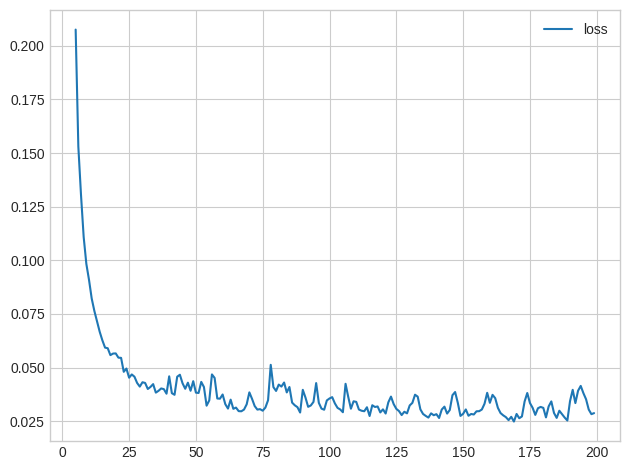

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();